<a href="https://colab.research.google.com/github/Gdan0326/Caffeine_Content_Metrics/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = '/content/drive/MyDrive/Colab Notebooks/Coding Dojo/First Portfolio Project/sales_predictions_2023.csv'
df = pd.read_csv(file)

In [4]:
# How many rows and columns?
df.shape

(8523, 12)

In [5]:
# What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Are there duplicates? If so, drop any duplicates
df[df.duplicated()]  # no duplicates
df = df.drop_duplicates()
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
#  Identify missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
item_weight_missing = df['Item_Weight'] .isna()
df.loc[item_weight_missing, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [9]:
# mean of Item_Weight
df['Item_Weight'].mean()

12.857645184135976

In [10]:
# I use the mean imputation for filling in missing data for 'Item_Weight' since the missing data is randomly distributed
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [11]:
# I use mode imputation for filling in missing data in 'Outlet_Size' since it is categorical data
mode = df['Outlet_Size'].mode()
df['Outlet_Size'].fillna('Medium', inplace = True)
df['Outlet_Size'].isna().sum()




0

In [29]:
# Replace all irrelevant type of values in columns
df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('reg', 'Low Fat', inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5634
Regular    2889
Name: Item_Fat_Content, dtype: int64

In [13]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean)

summary_stat_numerical_data = df.select_dtypes(include=['float64']).columns
df[summary_stat_numerical_data].describe()


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
df.corr()


<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [16]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

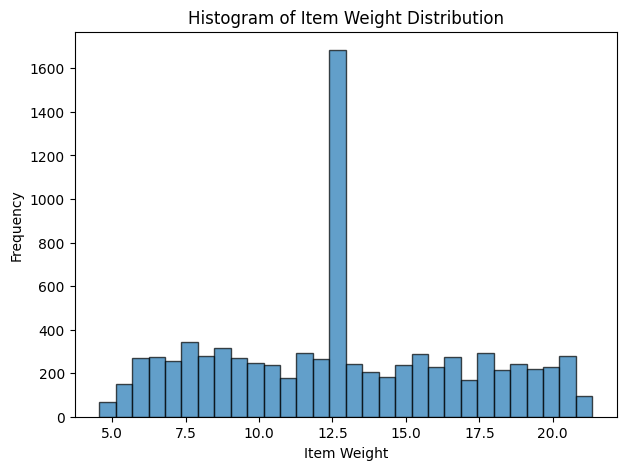

In [17]:
# Plot histogram for Item_Weight
# The distribution of item weight appears to be uniform or normal distribution, several items falling from 12.5 - 17.5 units
plt.figure(figsize=(7,5))
plt.hist(df['Item_Weight'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Item Weight Distribution')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

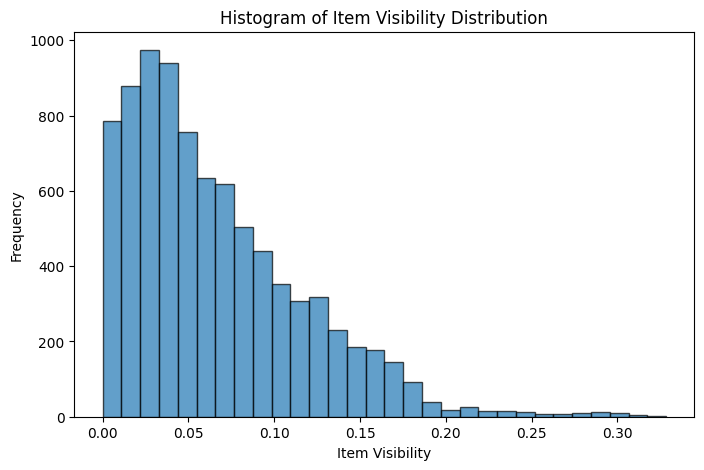

In [18]:
# Plot histogram for Item_Visibility
# The distribution of item visibility is right skewed, indicative of most items have very low visibility
plt.figure(figsize=(8, 5))
plt.hist(df['Item_Visibility'], bins = 30, edgecolor ='k', alpha=0.7)
plt.title('Histogram of Item Visibility Distribution')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

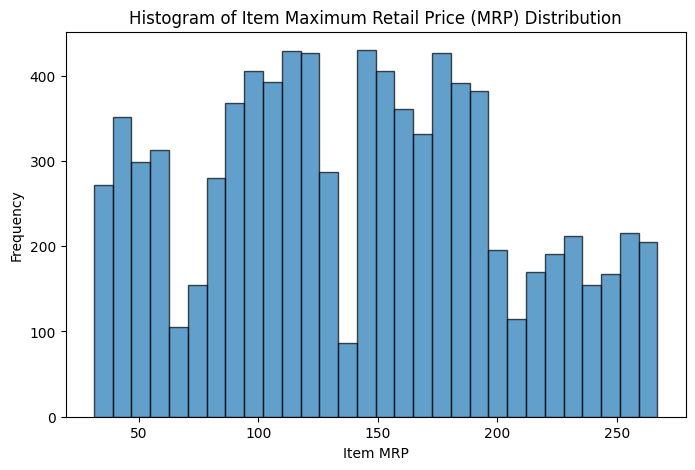

In [19]:
# Plot histogram for Item_MRP Distribution
# The distribution of Item MRP shows varying peaks which indicates that there are variety of goods sold at different price ranges
plt.figure(figsize=(8, 5))
plt.hist(df['Item_MRP'], bins = 30, edgecolor ='k', alpha =0.70)
plt.title('Histogram of Item Maximum Retail Price (MRP) Distribution')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()

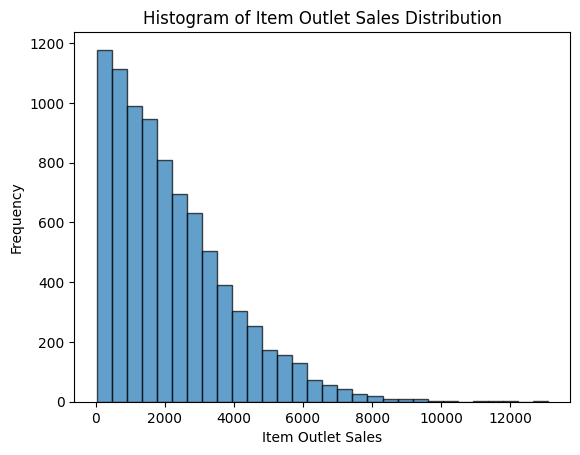

In [20]:
# Plot histogram for Item Outlet Sales
# The histogram of Item Outlet Sales Distribution reflects a positive distribution or right skewed which indicates that most of the items have 0 to low sales, while very few items have high sales
plt.hist(df['Item_Outlet_Sales'], bins = 30, edgecolor ='k', alpha =0.70)
plt.title('Histogram of Item Outlet Sales Distribution')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

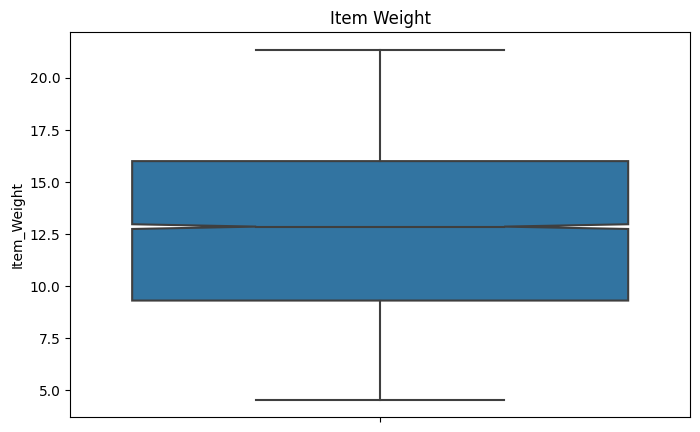

In [21]:
# Plot Boxplot for Item Weight
# from the boxplot we can infer that the median weight is around 12.5 units, and most of the items fall between 8.8 -17 units
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Item_Weight'], notch = True)
plt.title('Item Weight')
plt.show()

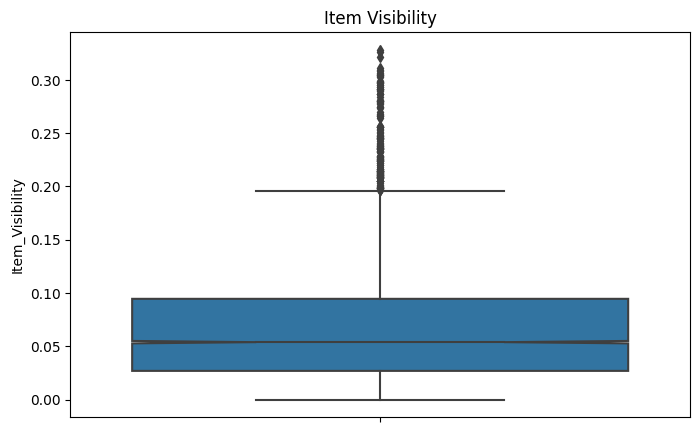

In [22]:
# Plot Boxplot for Item Visibility
# The figure shows that most of the items has low visibility from 0.2 to a median of .053
# while some of the items have higher visibility shown as outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Item_Visibility'], notch = True)
plt.title('Item Visibility')
plt.show()

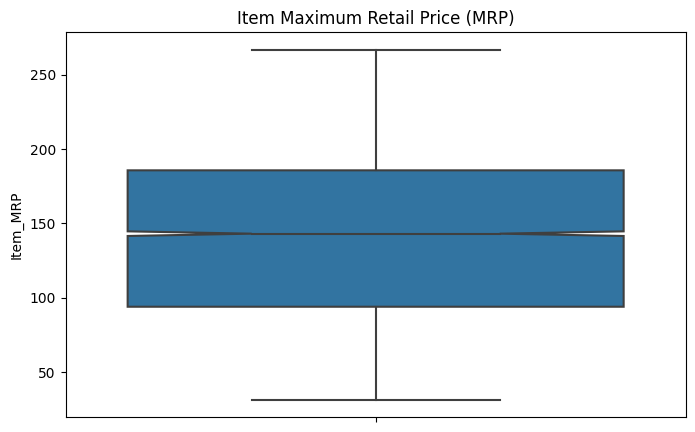

In [23]:
# Plot Boxplot for Item MRP
# The boxplot shows that the Median for MRP is around 143
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Item_MRP'], notch = True)
plt.title('Item Maximum Retail Price (MRP)')
plt.show()

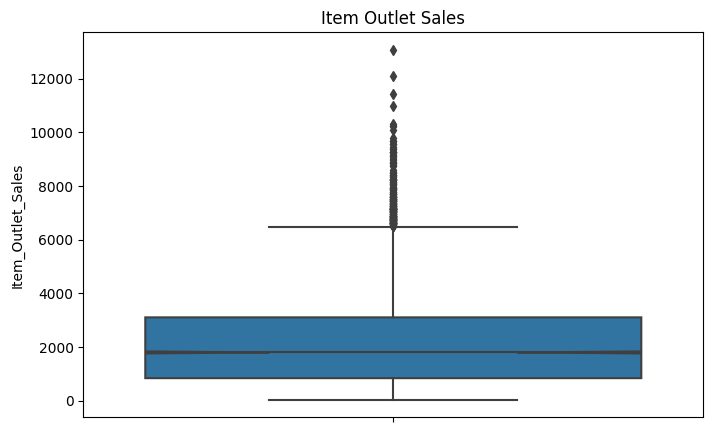

In [24]:
# Plot Boxplot for Item MRP
# The boxplot shows that the Median for MRP is around 1795 with outlier that indicates that some items have very high sales
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Item_Outlet_Sales'], notch = True)
plt.title('Item Outlet Sales')
plt.show()

<ipython-input-25-701ccabc1e10>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


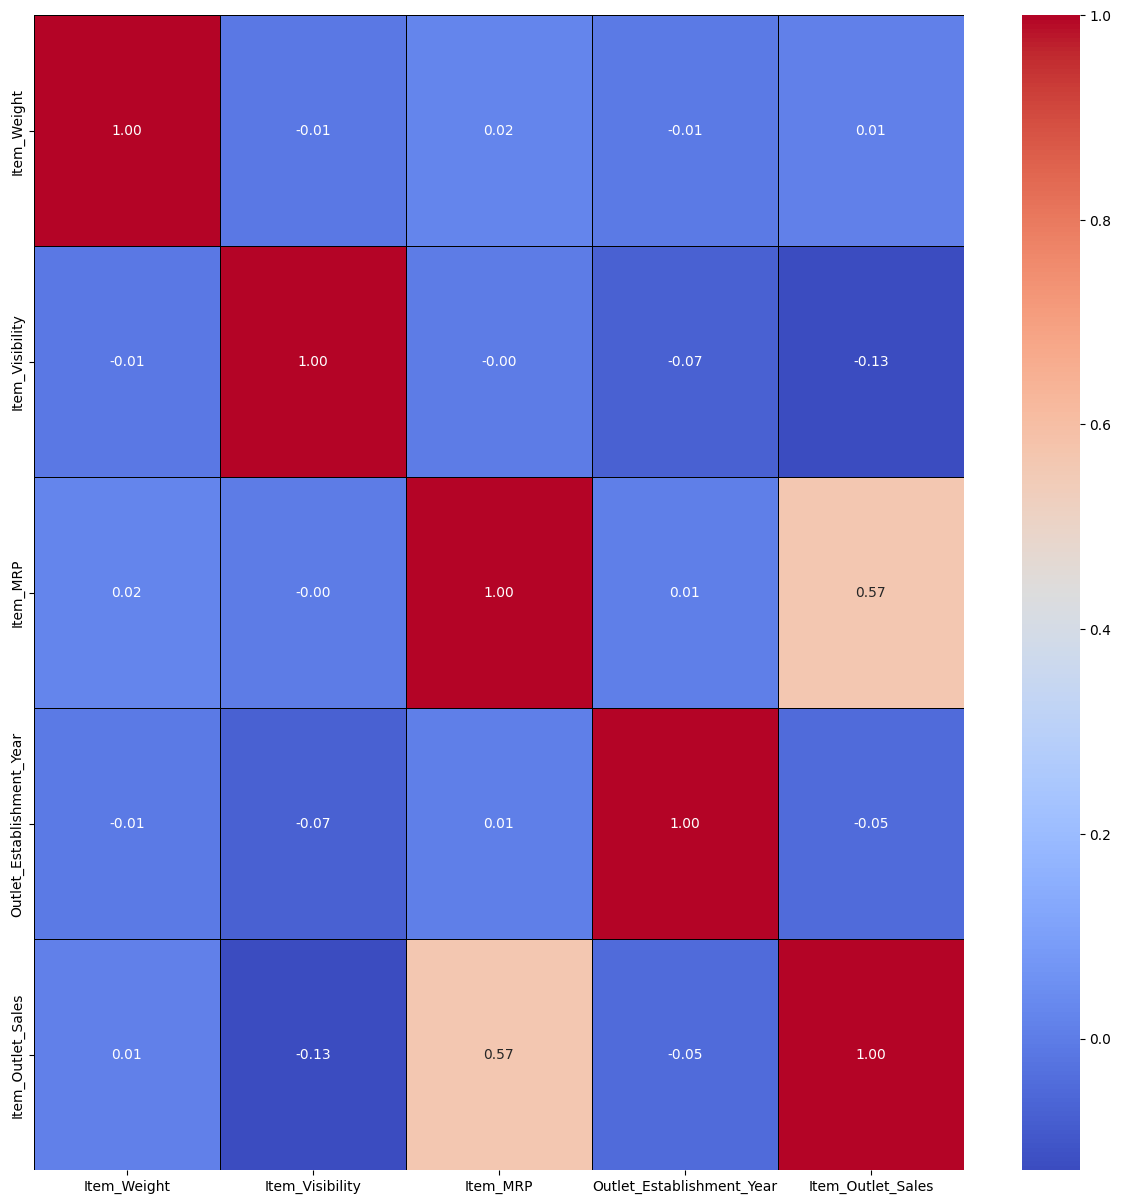

In [25]:
# Heatmap of the correlation between features
#  There is a moderate positive correlation between Item_MRP and Item_Outlet_Sales, this means that the higher MRP the more likely it will have higher sales
corr = df.corr()
plt.figure(figsize = (15,15));
sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt = '.2f', lw=.5, linecolor='k');

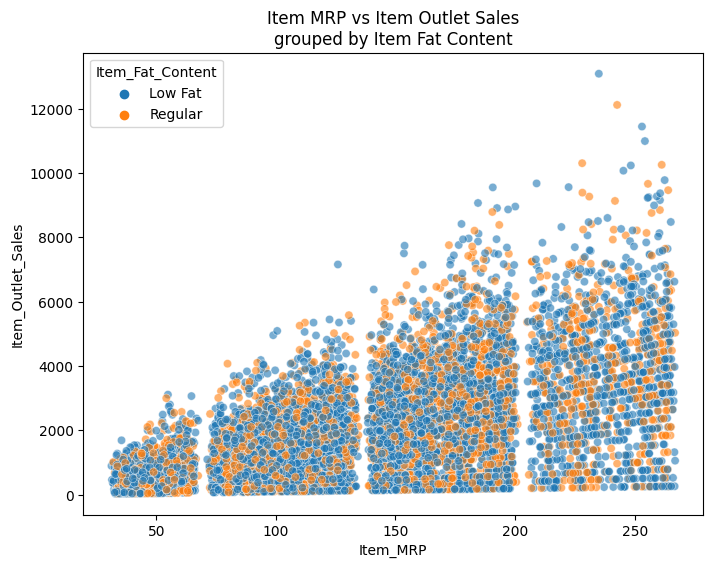

In [26]:
# scatter plot to show the relationship between Item_MRP, Item_Outlet_Sales, and Item_Fat_Content
# The spread of sales of Low Fat items is wider than the Regular fat content which suggests that low fat content items has higher sales
# items with lower to moderate MRP have notable number of higher sales especially in low fat content items
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=df, alpha=0.6)
plt.title('Item MRP vs Item Outlet Sales\ngrouped by Item Fat Content')
plt.show()

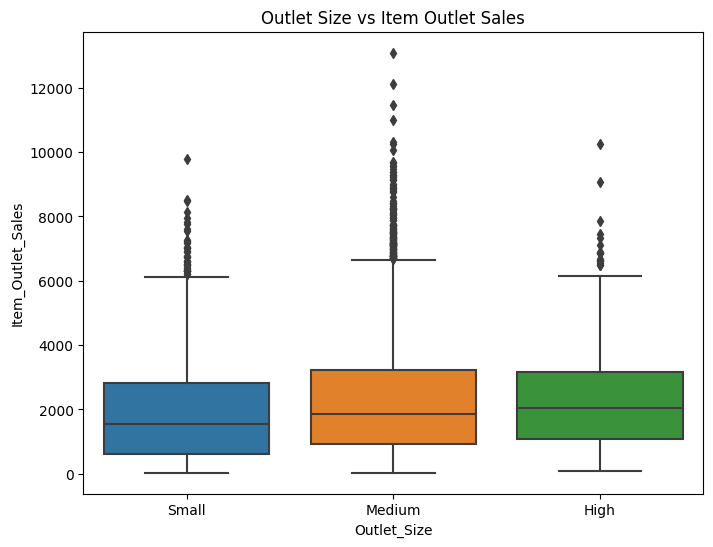

In [42]:
# Analyze relationship of Outlet Size and Item Outlet Sales
# High Outlet size displayed the highest median sales value, followed by medium outlet size and last is the small outlet size
# from the graph it can be inferred that outlet size have influence on the item outlet sales
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'Outlet_Size', y ='Item_Outlet_Sales', data = df, order =['Small', 'Medium', 'High'])
plt.title('Outlet Size vs Item Outlet Sales')
plt.show()

In [34]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [33]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')